In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Discrete distributions



### Bernoulli distribution
Experiment with binary outcome. Random variable $X \in \{0,1\}$ with
    $$ P(X=1) = p   ;  P(X=0) = 1-p $$
    
The **probability mass function** (*pmf*) is
\begin{equation}
 f_X(k;p) = p^k (1-p)^{(1-k)} \hspace{2cm} k \in \{0,1\}
\end{equation}

Expectation and variance of $X$:
\begin{equation}
\mu = p \hspace{2cm} \sigma^2 = p(1-p)
\end{equation}
    

### Binomial distribution
$n$ repetitions of an experiment with binary outcomes, with $p$ the probability of success. Random variable $X$ is the number of successes, and the *pmf* is given by:
\begin{equation}
 f_X (k; n, p) = P(X=k) = \binom{n}{k} p^k (1-p)^{(n-k)}  = \frac{n!}{k!(n-k)!)} p^k (1-p)^{(n-k)}
\end{equation}

Since each repetition is an independent Bernoulli trial, the Binomial random variable $X$ can be thought of as a sum of $n$ Bernoulli random variables $$ X = X_1 + X_2 + \cdots + X_n $$

This provides an elegant way to derive the expectation and  variance of $X$:
\begin{equation}
 \mu_X = E(X) = \sum_{i=1}^{n} E(X_i) = np \hspace{2cm} \sigma^2_X = \sum_{i=1}^{n} \sigma^2(X_i) = n p (1-p)
\end{equation}




In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

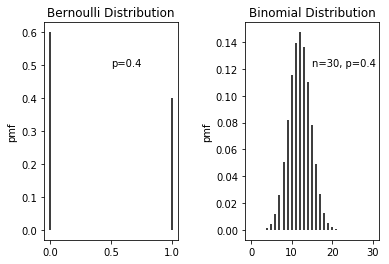

In [5]:

# Density functions

fig = plt.figure()
fig.subplots_adjust(wspace=0.5,hspace=0.5)

# Bernoulli
rv = stats.bernoulli(0.4)                   # So called "Frozen" rv: just means parameters have been fixed.

a1 = fig.add_subplot(1,2,1)
x=[0,1]
_ = a1.vlines(x,0,rv.pmf(x))
_ = a1.set(ylabel="pmf",title="Bernoulli Distribution")
_ = a1.text(0.5,0.8,"p=0.4", transform=a1.transAxes)

# Binomial
n,p = 30, 0.4 
rv = stats.binom(n,p)

a2 = fig.add_subplot(1,2,2)
x =  np.arange(n+1)
_ = a2.vlines(x,0,rv.pmf(x))

_ = a2.set(ylabel="pmf",title="Binomial Distribution")
_ = a2.text(0.5,0.8,"n=30, p=0.4", transform=a2.transAxes)

### Geometric distribution
Binary outcome, with probability of success $p$. Random variable $X$ is number of trials before first success. The *pmf* is
\begin{equation}
f_X(k;p) = (1-p)^{(k-1)} p^k \hspace{2cm} k \in \{1,2,3 \dots\}
\end{equation}

Expectation and variance of $X$:
\begin{equation}
\mu = \frac{1}{p} \hspace{2cm} \sigma^2 = \frac{(1-p)}{p^2}
\end{equation}
### Negative Binomial distribution
Binary outcome, trials continue until $r$ failures are seen. Random variable $X$ is the number of successes before stopping.
The *pmf* is
\begin{equation}
f_X(k;p,r) = \binom{k+r-1}{k} \cdot p^k (1-p)^r \hspace{2cm} k \in {0,1,2, \dots}
\end{equation}

The superscript on the binomial coefficient in the *pmf* is interesting: since the $r$-th failure is always the last one, the coefficient has to count the ways of choosing $k$ successes out of $(k+r-1)$ trials.

Expectation and variance of $X$:
\begin{equation}
\mu = \frac{pr}{1-p} \hspace{2cm} \sigma^2 = \frac{pr}{(1-p)^2}
\end{equation}

The distribution is called negative binomial because
$$ \binom{k+r-1}{k} = (-1)^k \binom{-r}{k} $$
Proof:

The binomial theorem can be written as:
$$ (1+x)^a = 1 + a x + \frac{a(a-1)x^2}{2!} + \cdots = \sum_{k=0}^\infty \binom{a}{k} x^k$$

When $a$ is negative, $$ \binom{a}{k} = \frac{a(a-1)\dots(a-k+1)}{k!} = \frac{(-1)^k (-a)(-a+1)\dots(-a+k-1)}{k!}$$

Setting $r=-a$, we have $$ \binom{-r}{k} = (-1)^k \frac{r(r+1)\dots(r+k-1)}{k!} = (-1)^k \binom{k+r-1}{k}$$


### Hypergeometric distribution

$n$ draws from a population with $N$ objects, of which $K$ are of one kind. The probability that $k$ of the $n$ draws are of that kind is given by the *pmf*
\begin{equation}
   f_X (k; N,K,n) = \frac{\binom{K}{k} \cdot \binom{N-K}{n-k}}{\binom{N}{n}}
\end{equation}

Expectation and variance:
\begin{equation}
    \mu = n\frac{K}{N} \hspace{2cm} \sigma^2 = n \frac{K}{N} \frac{(N-K)}{N} \frac{(N-n)}{(N-1)}
\end{equation}

[Nice proof on StackExchange](https://math.stackexchange.com/questions/1380460/derivation-of-mean-and-variance-of-hypergeometric-distribution)



### Poisson distribution

Random variable is number of counts or arrivals

\begin{equation}
    f_X(k; \lambda) = e^{-\lambda} \frac{\lambda^k}{k!} \hspace{2cm} k \in \{0,1,2,\dots\}
\end{equation}

Expectation and variance:
\begin{equation}
\mu = \lambda \hspace{2cm} \sigma^2 = \lambda
\end{equation}


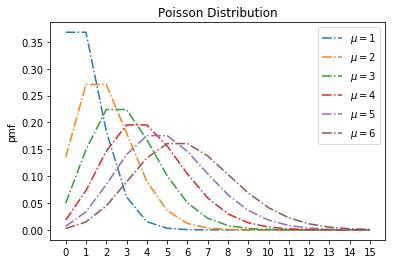

In [151]:
# Poisson 

fig = plt.figure

k = np.arange(16)        # Number of events: {0,1,2 ...}

# We want to plot multiple lines in the same plot, so we call plot repeatedly in a loop.
# The function returns objects whose text representation becomes output. To suppress that,
# we assign each call to a temp variable (the _ character is a valid variable name).

for mu in np.arange(1,7):
    _ = plt.plot(k,stats.poisson.pmf(k,mu), '-.',label=r"$\mu=$"+str(mu)) 
    _ = plt.legend()


# 'set' used for setting multiple things in one call. Works only with gca(): get current axes.

_ = plt.gca().set(ylabel = "pmf", title="Poisson Distribution",xticks=k)

# Notes:
    # The Poission distribution is discrete. Lines are simply guides to the eye.
    # The peak of the pmf plot shifts towards the value of mu (average number of events) 
    # because the modes are mu and mu-1
                                                                       

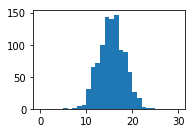

In [4]:
# Drawing random numbers from a distribution

x = np.random.binomial(n=30,p=0.5,size=1000) # Thousand draws from a Bin(30,0.5) discrete distribution

fig = plt.figure()
a1 = fig.add_subplot(2,2,1)
_ = plt.hist(x,bins=30,range=(0,30))

x2 = np.random